**Import Library**

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**Download and prepare the CIFAR-10 dataset**

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

**Feature Extraction - Convolutional Base**

In [4]:
train_images[100].shape

(32, 32, 3)

In [65]:
model = models.Sequential()
model.add(layers.Conv2D( 16, (3,3), activation='relu', input_shape=(32,32,3) ) )
model.add(layers.MaxPooling2D( (2,2) ))
model.add(layers.Conv2D( 16, (3,3), activation='relu' ) )
model.add(layers.MaxPooling2D( (2,2) ))
model.add(layers.Conv2D( 16, (3,3), activation='relu' ) )
model.add(layers.Dropout(0.25))

In [66]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 6, 6, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 4, 4, 16)          2320      
                                                                 
 dropout_9 (Dropout)         (None, 4, 4, 16)        

**Flatten & Fully Connected Layer**

In [67]:
model.add(layers.Flatten())
model.add(layers.Dense(256, activation= 'relu'))
model.add(layers.Dense(256))

In [68]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 6, 6, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 4, 4, 16)          2320      
                                                                 
 dropout_9 (Dropout)         (None, 4, 4, 16)        

**Compile and train the model**

In [69]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [70]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=100, validation_data=(test_images, test_labels))

Epoch 1/10
500/500 [==============================] - 12s 23ms/step - loss: 1.9042 - accuracy: 0.3168 - val_loss: 1.5683 - val_accuracy: 0.4241
Epoch 2/10
500/500 [==============================] - 12s 23ms/step - loss: 1.5205 - accuracy: 0.4485 - val_loss: 1.4374 - val_accuracy: 0.4892
Epoch 3/10
500/500 [==============================] - 12s 23ms/step - loss: 1.4035 - accuracy: 0.4962 - val_loss: 1.3245 - val_accuracy: 0.5206
Epoch 4/10
500/500 [==============================] - 11s 23ms/step - loss: 1.3278 - accuracy: 0.5234 - val_loss: 1.2524 - val_accuracy: 0.5533
Epoch 5/10
500/500 [==============================] - 13s 25ms/step - loss: 1.2644 - accuracy: 0.5473 - val_loss: 1.2141 - val_accuracy: 0.5664
Epoch 6/10
500/500 [==============================] - 12s 24ms/step - loss: 1.2206 - accuracy: 0.5676 - val_loss: 1.1619 - val_accuracy: 0.5893
Epoch 7/10
500/500 [==============================] - 11s 22ms/step - loss: 1.1781 - accuracy: 0.5804 - val_loss: 1.1482 - val_accuracy:

**Evaluate the model**

In [71]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.0667 - accuracy: 0.6215


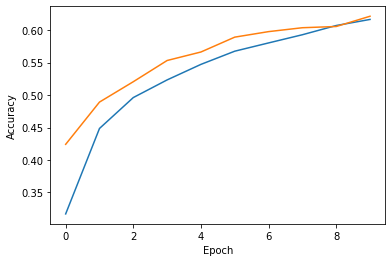

In [72]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()




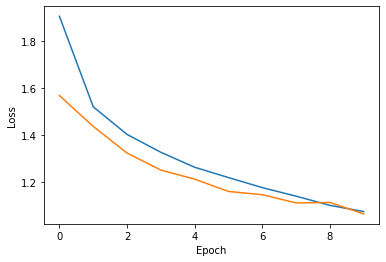

In [73]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


